In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [123]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [124]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [126]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


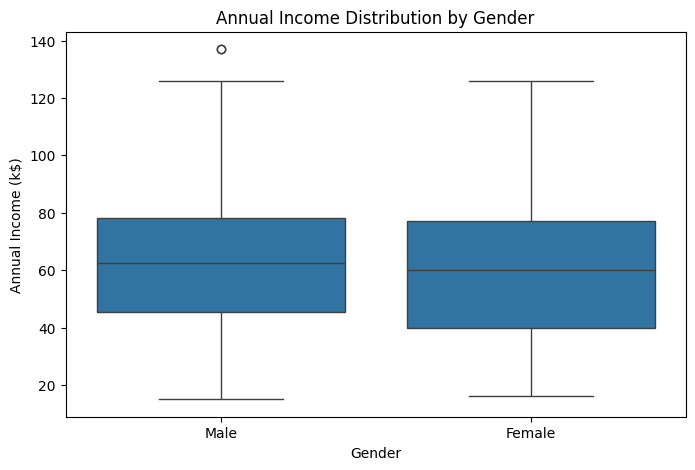

In [127]:
# make an insightful visualization and explain

# Annual Income Distribution by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='AnnualIncome')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.show()

# This box plot shows the distribution of annual incomes for males and females.
# Both genders have a similar median income around $60k, but males have a slightly wider range with one noticeable outlier above $120k.

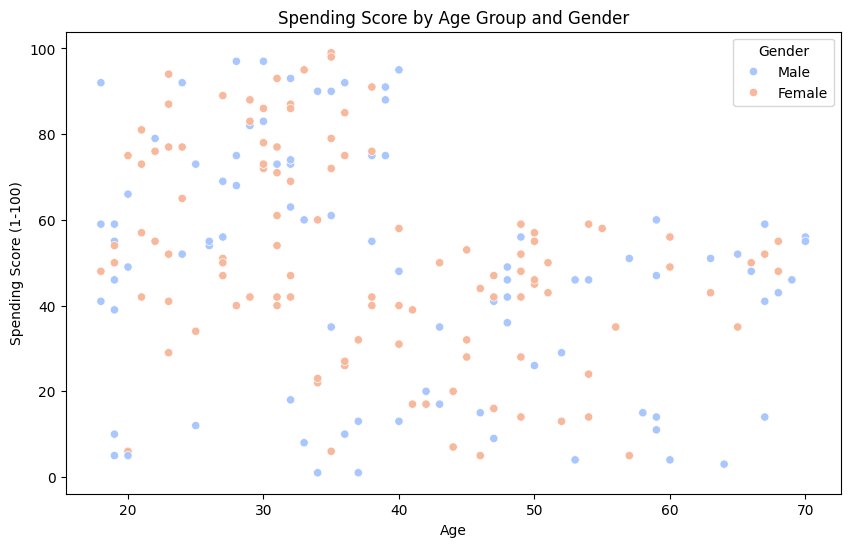

In [128]:
# make an insightful visualization and explain

# Scatter plot of Spending Score by Age Group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='SpendingScore', hue='Gender', palette='coolwarm')
plt.title('Spending Score by Age Group and Gender')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# This scatter plot shows how spending scores vary by age for males and females.
# There's a diverse range of spending scores across all age groups, with no clear gender-specific pattern.

## Data Preprocessing

For this case study, we only use income and spending score

In [129]:
# create new dataframe that consist only annual income and spending score
df_new = df[['AnnualIncome', 'SpendingScore']]
df_new.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [130]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

df_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [131]:
# get stastical information on the new dataset
df_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

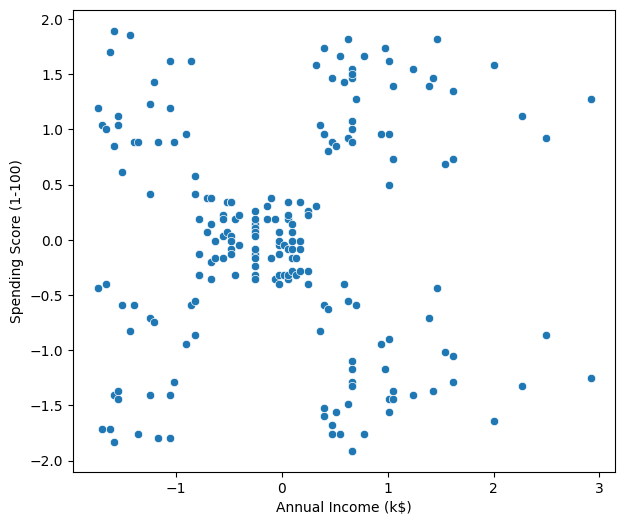

In [132]:
# Visualize the position
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

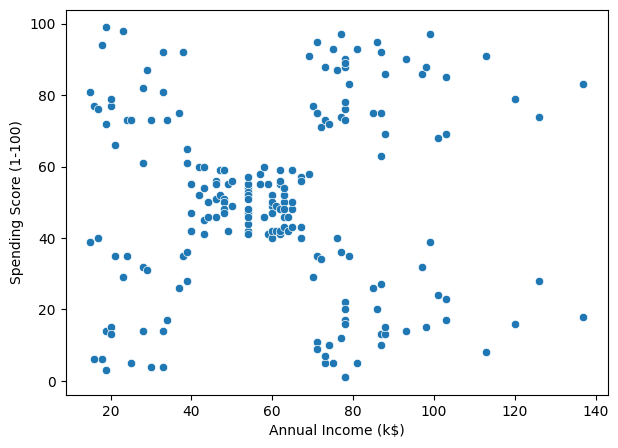

In [133]:
# Visualize the position using the original scale
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_new, x='AnnualIncome', y='SpendingScore')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [134]:
# set the parameter for evaluating K
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

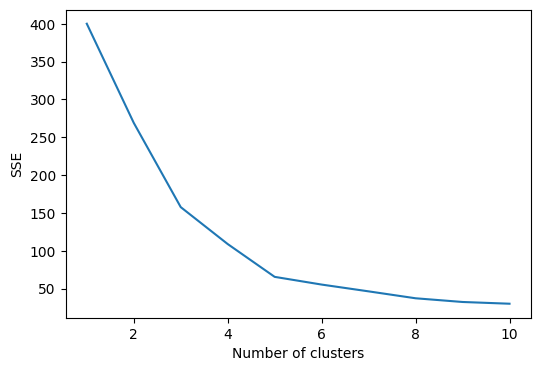

In [135]:
# manually visualize the elbow method using plotlib
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [136]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [137]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

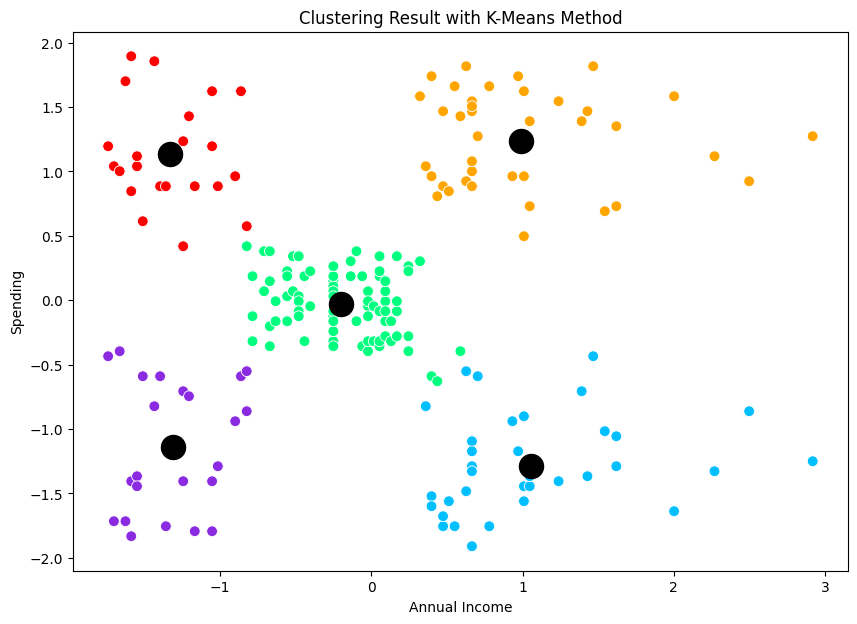

In [138]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore', hue=y_pred, palette=["blueviolet",
                                                                                          "red",
                                                                                          "deepskyblue",
                                                                                          "orange",
                                                                                          "springgreen"],
                legend=None, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=300)
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.title('Clustering Result with K-Means Method')
plt.show()

In [139]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

# Add the cluster labels to the original data
df_inverse['Cluster'] = y_pred

# Analyze the clusters with the original values
df_inverse.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [140]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_inverse.groupby('Cluster').agg({'SpendingScore': ['mean', 'std', 'min', 'max'],
                                             'AnnualIncome': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

### **Cluster Interpretation and Suggestions**

1. **Cluster 0 - Low Income, Low Spending**
   - **Profile:** Customers in this cluster have low annual incomes (mean of 26.3) and low spending scores (mean of 20.9), indicating they are conservative spenders.
   - **Strategy:** Focus on budget-friendly products and basic offerings. Promotions like bundle deals or loyalty programs emphasizing discounts and savings could help increase engagement from this segment.

2. **Cluster 1 - Low Income, High Spending**
   - **Profile:** Despite having low incomes (mean of 25.7), these customers have a high spending score (mean of 79.4), suggesting they are willing to spend on preferred products, likely for specific brands or experiences.
   - **Strategy:** This segment might respond well to exclusive deals on aspirational or trendy items. Offer installment options or rewards points that can be redeemed on future purchases to encourage repeat buying.

3. **Cluster 2 - High Income, Low Spending**
   - **Profile:** These customers have high incomes (mean of 88.2) but low spending scores (mean of 17.1), indicating they are financially well-off but selective or cautious about their purchases.
   - **Strategy:** Appeal to their value-driven mindset by emphasizing product quality and long-term value. Offering member-only benefits, such as special savings or early access to sales, could encourage them to engage more frequently.

4. **Cluster 3 - High Income, High Spending**
   - **Profile:** This group has both high incomes (mean of 86.5) and high spending scores (mean of 82.1), making them a premium customer segment.
   - **Strategy:** Emphasize exclusivity and luxury. Personalized shopping experiences, VIP loyalty programs, and access to premium product lines would likely resonate with this group, enhancing both satisfaction and loyalty.

5. **Cluster 4 - Middle Income, Moderate Spending**
   - **Profile:** Customers in this cluster have a moderate income (mean of 55.3) and an average spending score (mean of 49.5), reflecting a balanced, value-conscious spending pattern.
   - **Strategy:** Position mid-range products and highlight seasonal deals. Offering value-for-money options and flexible payment methods could appeal to this group, encouraging more frequent purchases.

### **General Recommendations for the Company**

- **Personalized Marketing:** Use these clusters to segment marketing campaigns. For instance, high-spending clusters can be targeted with premium offerings, while budget-conscious clusters receive promotional discounts.
- **Product Recommendations and Inventory Optimization:** Tailor product recommendations to fit each cluster’s profile, ensuring that inventory levels align with anticipated demand.
- **Loyalty Programs:** Create tiered loyalty programs that cater to each segment’s spending habits, enhancing customer retention and satisfaction across all groups.

By addressing each cluster’s unique needs, the company can improve customer satisfaction, increase engagement, and boost overall profitability.

<write here>